<a href="https://colab.research.google.com/github/Pravansh-Walia/college-projects/blob/main/CV_Personality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv

# Define the file path to your dataset
file_path = 'Resume(3).csv'  # Replace with your file path

# Initialize an empty list to store valid rows
valid_rows = []

# Open the CSV file and handle errors
try:
    with open(file_path, 'r', newline='', encoding='utf-8') as csvfile:
        csvreader = csv.reader(csvfile)

        for row in csvreader:
            try:
                # Attempt to append the row to the list
                valid_rows.append(row)
            except csv.Error as e:
                print(f"CSV Error in row {csvreader.line_num}: {e}")
except FileNotFoundError:
    print(f"File not found: {file_path}")

# Convert the list of valid rows to a DataFrame
df = pd.DataFrame(valid_rows)

# Display the first few rows of the DataFrame
print(df.head())


          0                                                  1  \
0        ID                                         Resume_str   
1  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
2  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
3  33176873           HR DIRECTOR       Summary      Over 2...   
4  27018550           HR SPECIALIST       Summary    Dedica...   

                                                   2         3  
0                                        Resume_html  Category  
1  <div class="fontsize fontface vmargins hmargin...        HR  
2  <div class="fontsize fontface vmargins hmargin...        HR  
3  <div class="fontsize fontface vmargins hmargin...        HR  
4  <div class="fontsize fontface vmargins hmargin...        HR  


In [ ]:
df.columns

RangeIndex(start=0, stop=4, step=1)

In [ ]:
# Set column names based on the first row
df.columns = df.iloc[0]

# Drop the first row, which contains column names
df = df[1:]


In [ ]:
# Handle missing values (e.g., replace NaN with an empty string for text data)
# Assuming the column containing resume text data is named 'Resume_str'
df['Resume_str'].fillna('', inplace=True)

# Data cleaning (if needed)
# For example, you can drop irrelevant columns
# df.drop(columns=['Column1', 'Column2'], inplace=True)

# Text preprocessing
# Lowercase text, tokenize, and remove stopwords and special characters
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word.isalnum()]  # Remove special characters
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

df['Cleaned_Resume'] = df['Resume_str'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Handle missing values (e.g., replace NaN with an empty string for text data)
# Assuming the column containing resume text data is named 'Resume_str'
df['Resume_str'].fillna('', inplace=True)

# Data cleaning (if needed)
# For example, you can drop irrelevant columns
# df.drop(columns=['Column1', 'Column2'], inplace=True)

# Text preprocessing
# Lowercase text, tokenize, and remove stopwords and special characters
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word.isalnum()]  # Remove special characters
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

df['Cleaned_Resume'] = df['Resume_str'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(df.head())

0        ID                                         Resume_str  \
1  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
2  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
3  33176873           HR DIRECTOR       Summary      Over 2...   
4  27018550           HR SPECIALIST       Summary    Dedica...   
5  17812897           HR MANAGER         Skill Highlights  ...   

0                                        Resume_html Category  \
1  <div class="fontsize fontface vmargins hmargin...       HR   
2  <div class="fontsize fontface vmargins hmargin...       HR   
3  <div class="fontsize fontface vmargins hmargin...       HR   
4  <div class="fontsize fontface vmargins hmargin...       HR   
5  <div class="fontsize fontface vmargins hmargin...       HR   

0                                     Cleaned_Resume  
1  hr associate hr administrator summary dedicate...  
2  hr specialist us hr operations summary versati...  
3  hr director summary 20 years experience recr

In [ ]:
import numpy as np
# Word Count
df['Word_Count'] = df['Cleaned_Resume'].apply(lambda x: len(x.split()))

# Average Word Length
df['Avg_Word_Length'] = df['Cleaned_Resume'].apply(lambda x: np.mean([len(word) for word in x.split()]))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, lowercase=True, stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Resume'])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Join the TF-IDF DataFrame with the original DataFrame
df = pd.concat([df, tfidf_df], axis=1)


In [ ]:
# Handle missing values in 'Cleaned_Resume' by filling with an empty string
df['Cleaned_Resume'].fillna('', inplace=True)



import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = sia.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to each resume and create new columns for sentiment scores
df['Sentiment_Scores'] = df['Cleaned_Resume'].apply(get_sentiment_scores)

# Extract individual sentiment scores
df['Sentiment_Positive'] = df['Sentiment_Scores'].apply(lambda x: x['pos'])
df['Sentiment_Negative'] = df['Sentiment_Scores'].apply(lambda x: x['neg'])
df['Sentiment_Neutral'] = df['Sentiment_Scores'].apply(lambda x: x['neu'])
df['Sentiment_Compound'] = df['Sentiment_Scores'].apply(lambda x: x['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import tensorflow as tf
from tensorflow import keras


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[['Word_Count', 'Avg_Word_Length']] = scaler.fit_transform(df[['Word_Count', 'Avg_Word_Length']])


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Cleaned_Resume', axis=1)

# Select the features you want to include in X_train and X_val
# Handle missing values in 'Cleaned_Resume' by filling with an empty string
df['Cleaned_Resume'].fillna('', inplace=True)








In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import tensorflow as tf
from tensorflow import keras



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[['Word_Count', 'Avg_Word_Length']] = scaler.fit_transform(df[['Word_Count', 'Avg_Word_Length']])




In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Cleaned_Resume', axis=1)

# Select the features you want to include in X_train and X_val
selected_features = ['Word_Count', 'Avg_Word_Length', 'Sentiment_Positive', 'Sentiment_Negative', 'Sentiment_Neutral', 'Sentiment_Compound']

# Construct X_train and X_val using the selected features
X_train, X_val = train_test_split(df[selected_features], test_size=0.2, random_state=42)



In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the dimensions for the input and encoded representations
input_dim = X_train.shape[1]
encoding_dim = 256  # Adjust based on your needs

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder layers
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dropout(0.2)(encoded)  # Adding dropout for regularization

# Decoder layers
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model with custom learning rate
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,  # Increase the number of epochs
    batch_size=64,  # Adjust batch size
    validation_data=(X_val, X_val),
    callbacks=[early_stopping]
)


Epoch 1/100
1/1 [==============================] - 1s 803ms/step - loss: nan - val_loss: nan
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: nan - val_loss: nan
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: nan - val_loss: nan
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: nan - val_loss: nan
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: nan - val_loss: nan
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: nan - val_loss: nan
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: nan - val_loss: nan
Epoch 8/100
1/1 [==============================] - 0s 29ms/step - loss: nan - val_loss: nan
Epoch 9/100
1/1 [==============================] - 0s 32ms/step - loss: nan - val_loss: nan
Epoch 10/100
1/1 [==============================] - 0s 40ms/step - loss: nan - val_loss: nan


In [ ]:

import numpy as np

# Check for NaN values in the NumPy array
nan_values = np.isnan(X_train)

# Get the count of NaN values in each column
nan_count_per_column = np.sum(nan_values, axis=0)

print("NaN counts per column:", nan_count_per_column)



NaN counts per column: Word_Count            1
Avg_Word_Length       1
Sentiment_Positive    0
Sentiment_Negative    0
Sentiment_Neutral     0
Sentiment_Compound    0
dtype: int64


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select relevant features for clustering
selected_features = ["Word_Count", "Avg_Word_Length", "Sentiment_Positive", "Sentiment_Negative", "Sentiment_Neutral"]

# Create a subset of data with selected features
data_subset = df[selected_features]

# Impute missing values with the mean of each feature
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_subset)

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Choose the number of clusters (K)
k = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# The 'Cluster' column in df now contains cluster assignments


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_statistics = df.groupby('Cluster')[selected_features].mean()
print(cluster_statistics)


         Word_Count  Avg_Word_Length  Sentiment_Positive  Sentiment_Negative  \
Cluster                                                                        
0          0.279680         0.172559            0.138700            0.027400   
1               NaN              NaN            0.000000            0.000000   
2          0.458761         0.568014            0.197375            0.016500   
3          0.246927         0.576868            0.152462            0.010769   
4          0.526541         0.818486            0.119625            0.034125   

         Sentiment_Neutral  
Cluster                     
0                 0.834000  
1                 0.000000  
2                 0.786125  
3                 0.836692  
4                 0.846375  


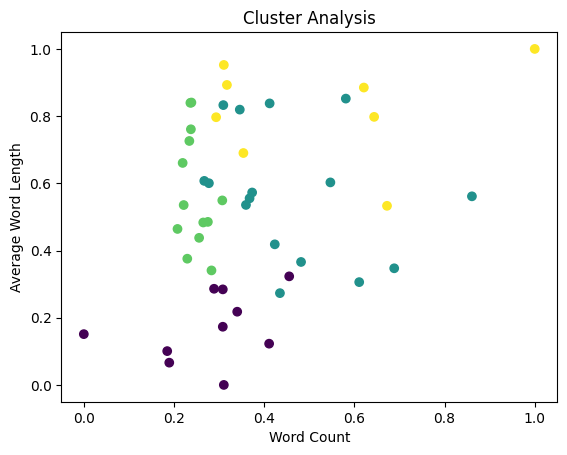

In [ ]:
import matplotlib.pyplot as plt

# Example scatter plot of 'Word_Count' vs. 'Avg_Word_Length'
plt.scatter(df['Word_Count'], df['Avg_Word_Length'], c=df['Cluster'])
plt.xlabel('Word Count')
plt.ylabel('Average Word Length')
plt.title('Cluster Analysis')
plt.show()


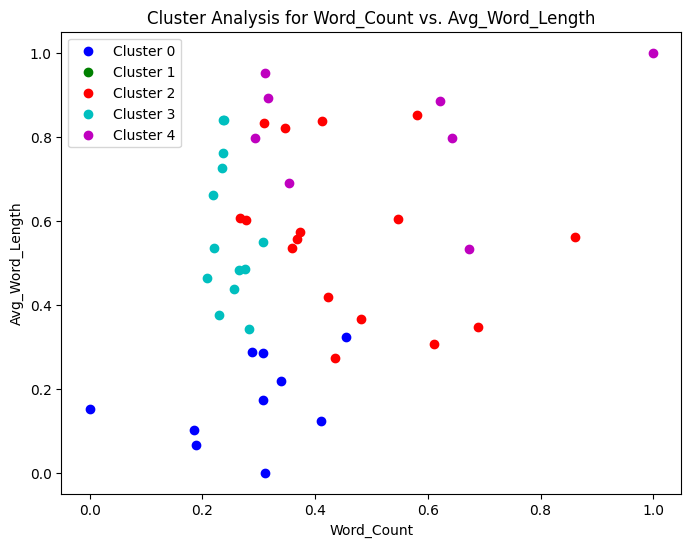

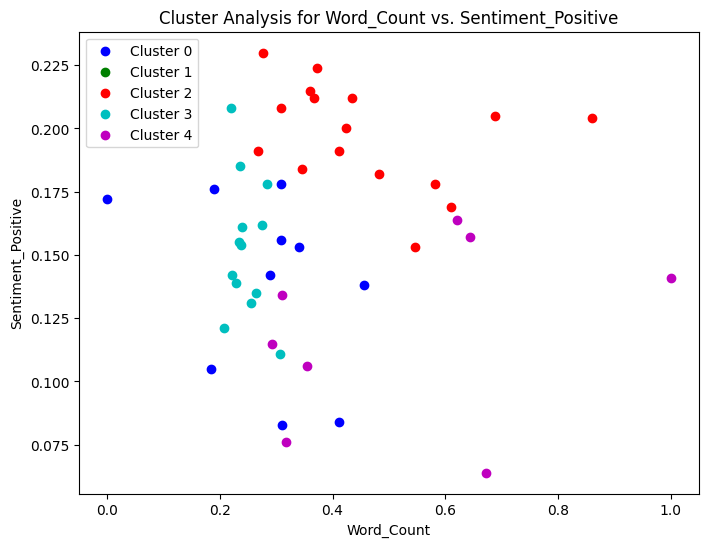

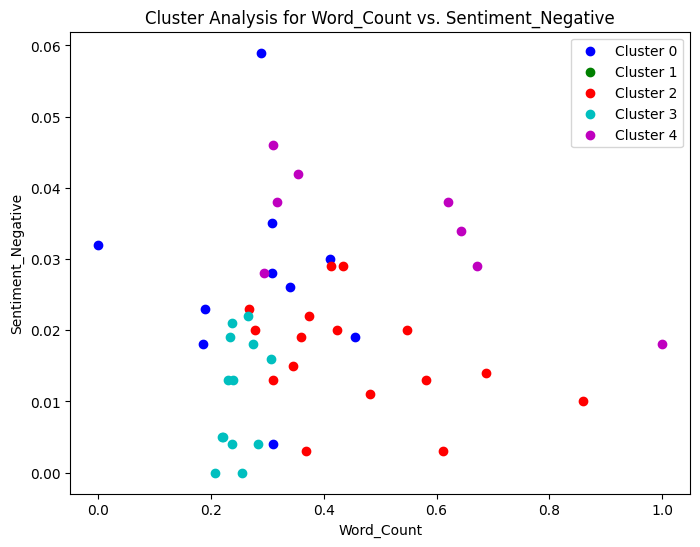

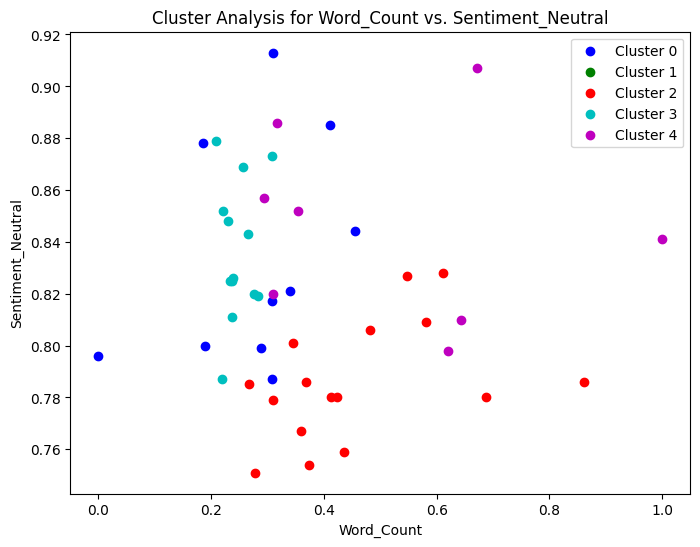

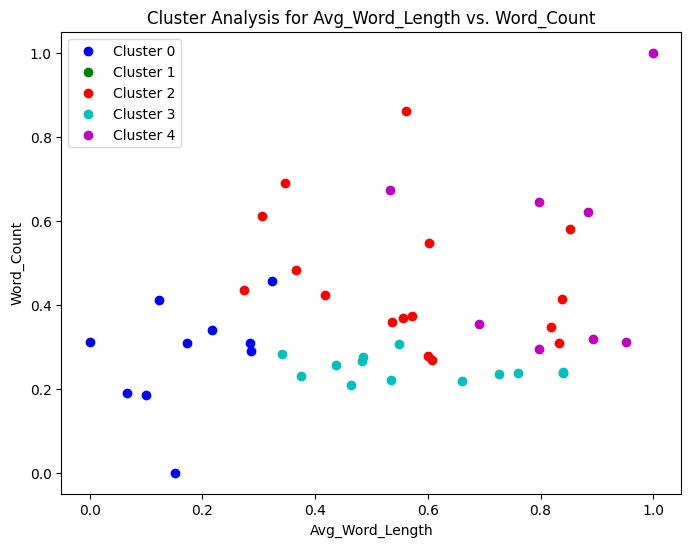

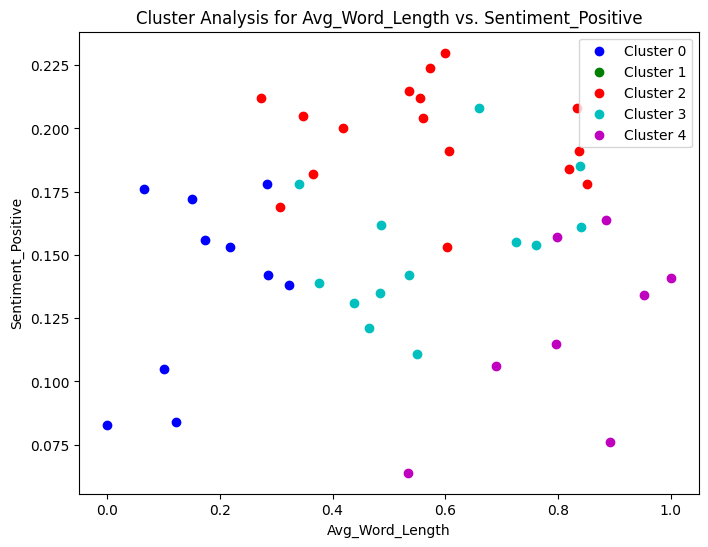

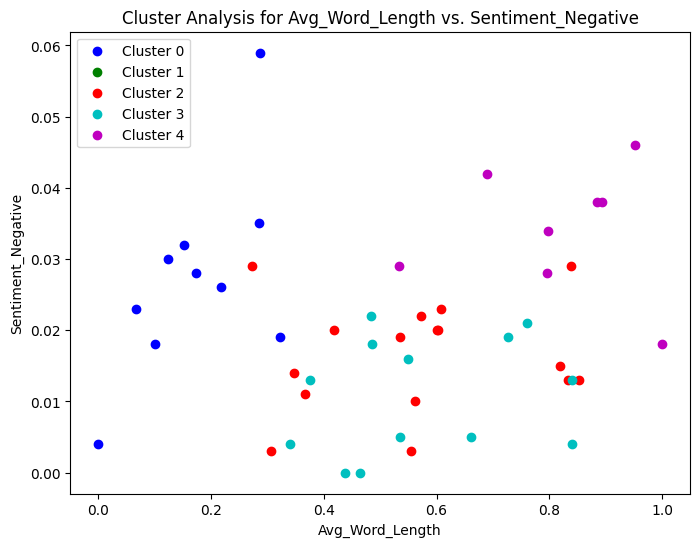

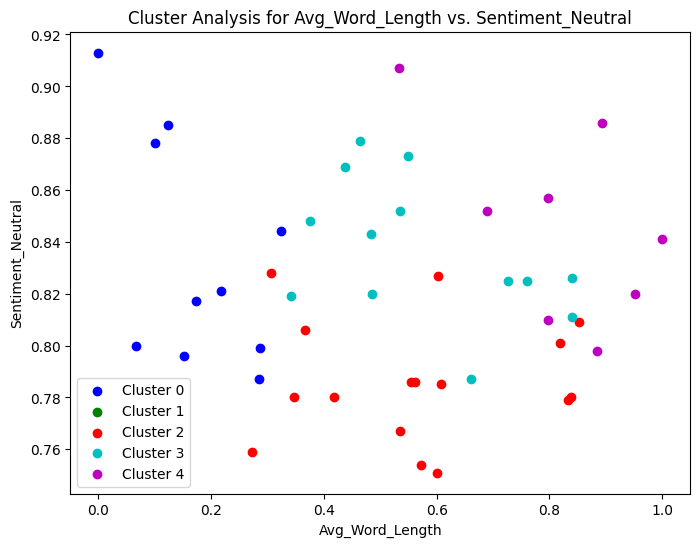

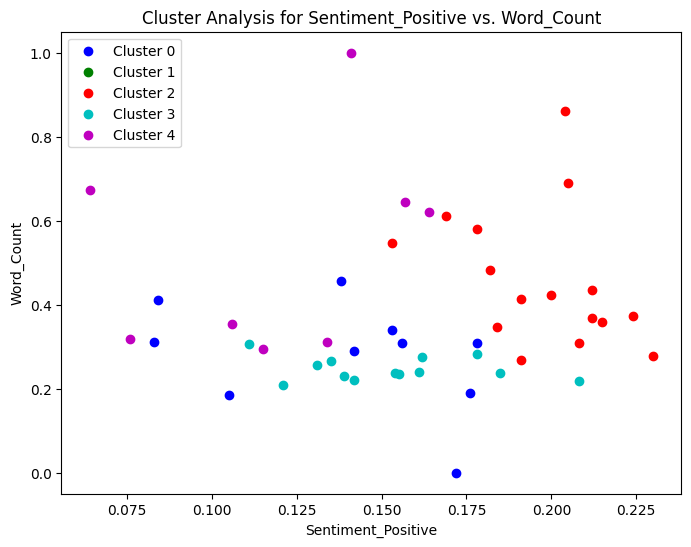

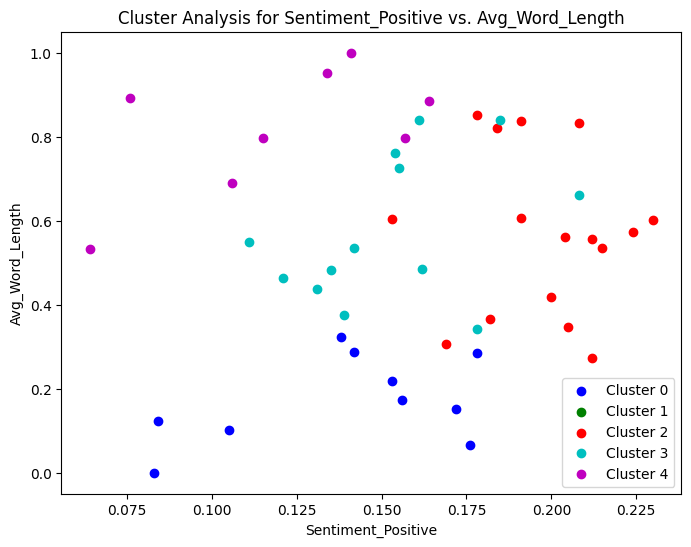

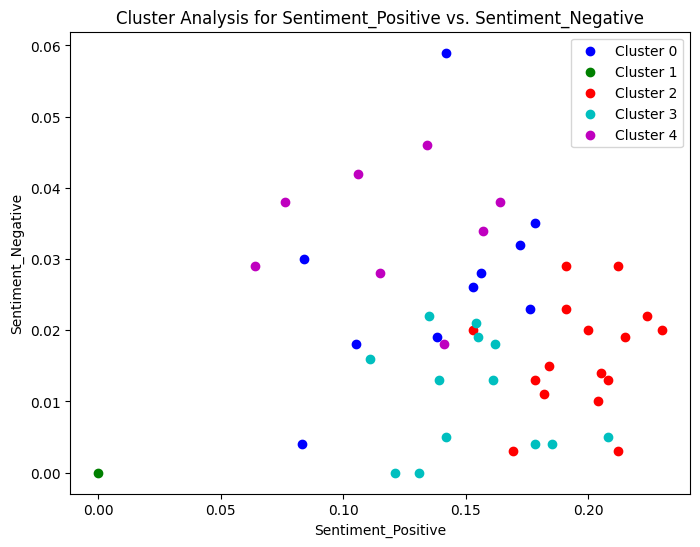

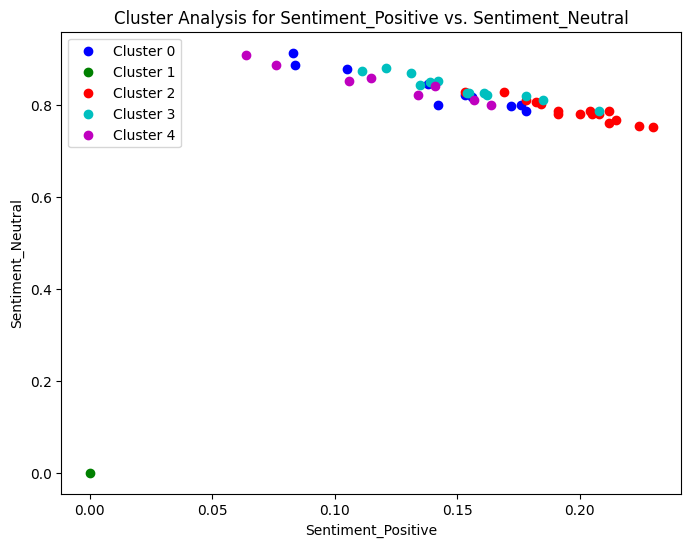

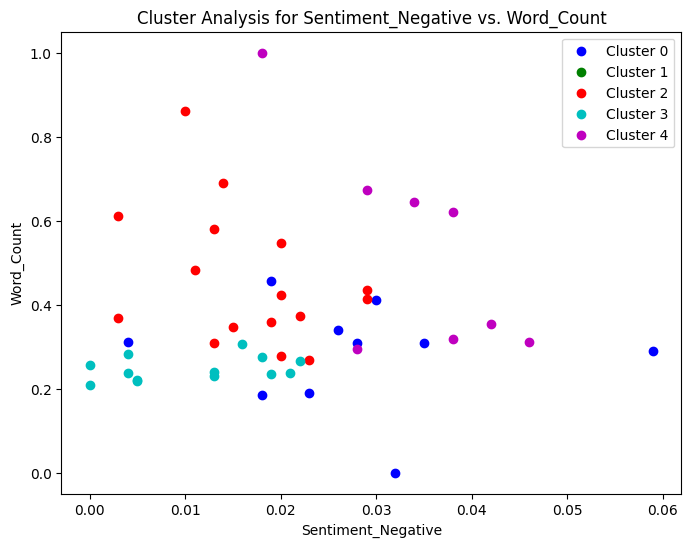

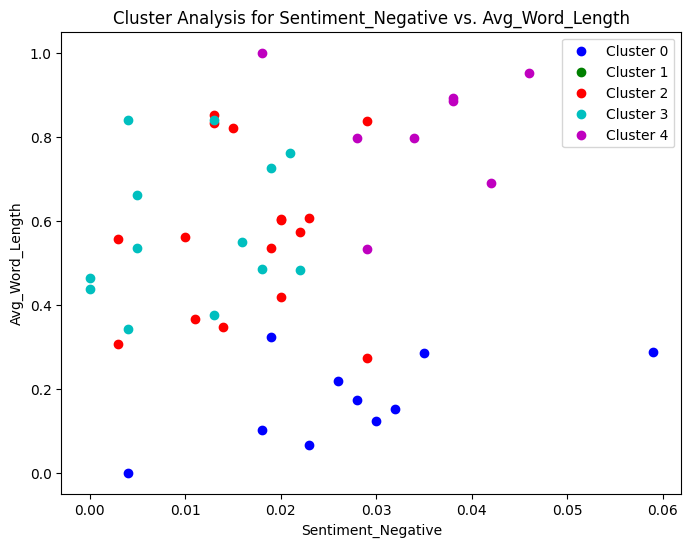

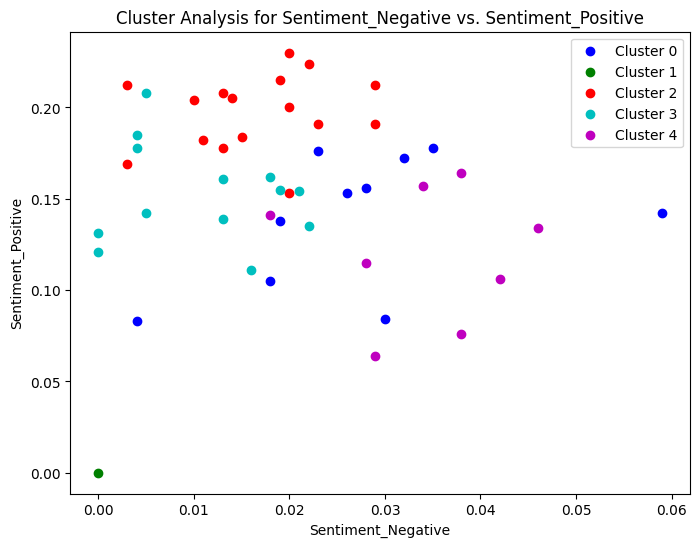

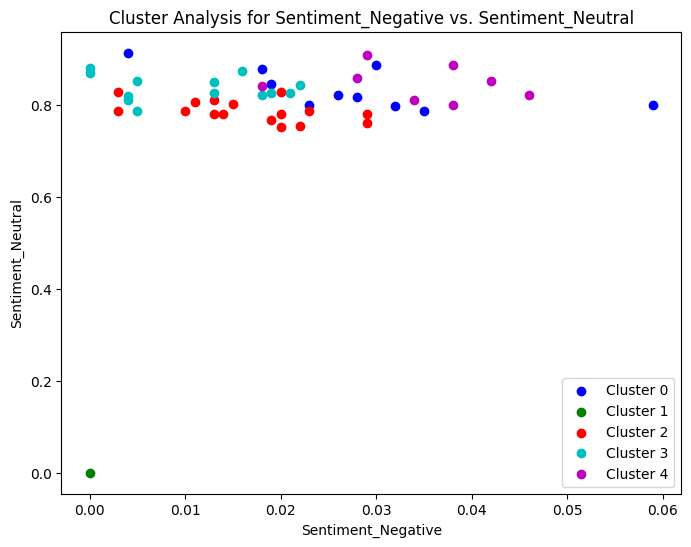

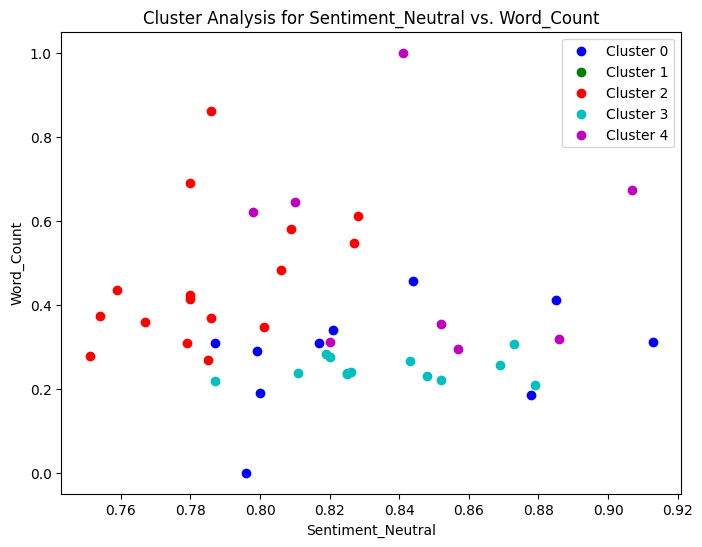

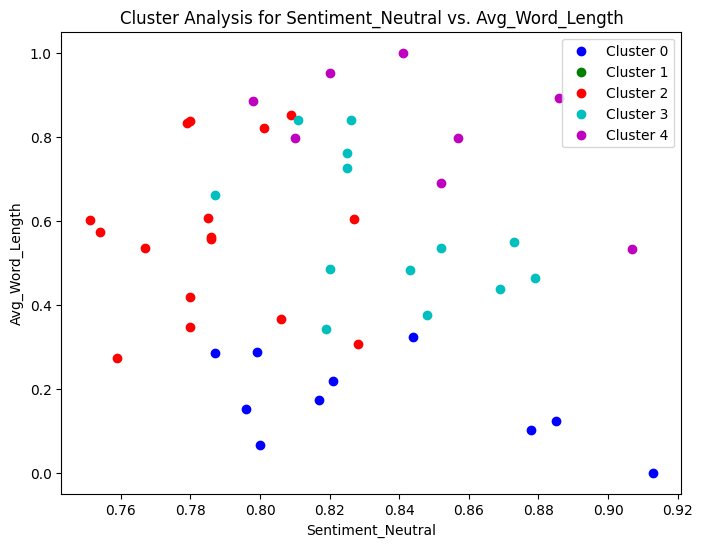

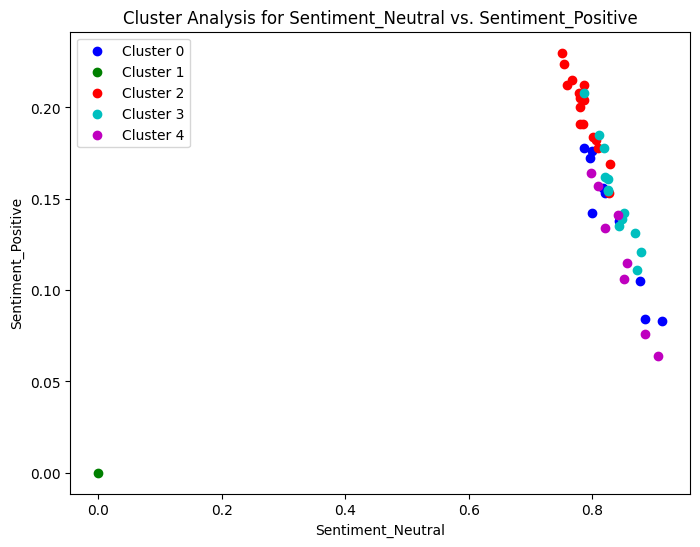

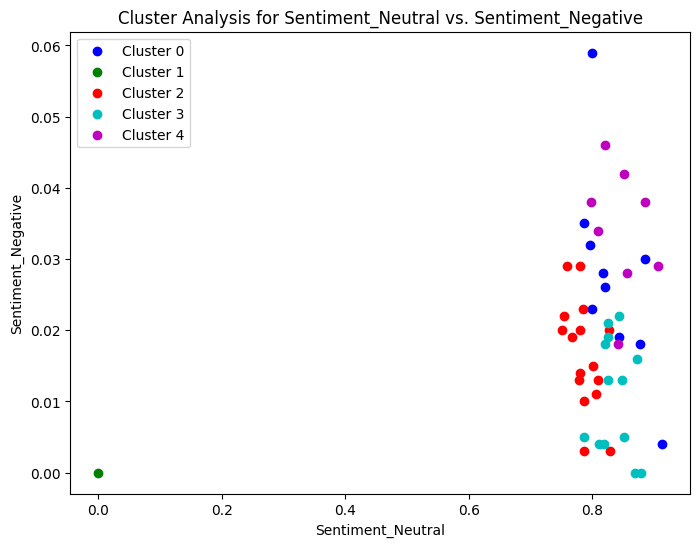

In [ ]:
import matplotlib.pyplot as plt

# Define colors for clusters
colors = ['b', 'g', 'r', 'c', 'm']

# Create a scatter plot for each feature combination
for feature1 in selected_features:
    for feature2 in selected_features:
        if feature1 == feature2:
            continue

        plt.figure(figsize=(8, 6))
        for cluster_id in range(k):
            plt.scatter(
                df[df['Cluster'] == cluster_id][feature1],
                df[df['Cluster'] == cluster_id][feature2],
                c=colors[cluster_id],
                label=f'Cluster {cluster_id}'
            )
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title(f'Cluster Analysis for {feature1} vs. {feature2}')
        plt.legend()
        plt.show()


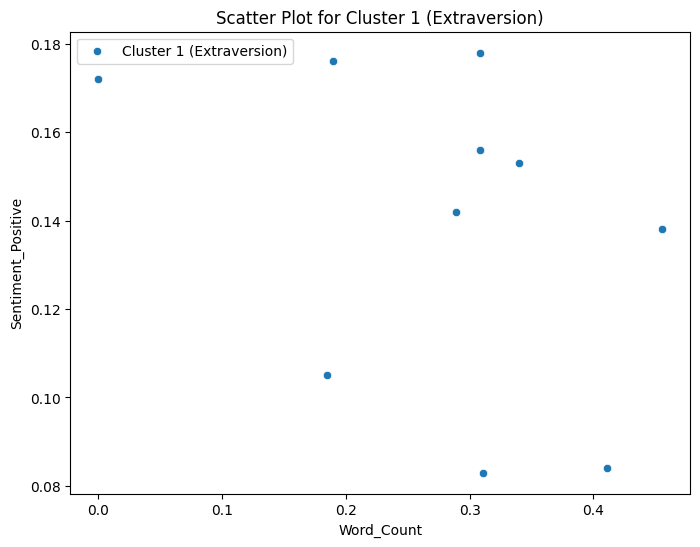

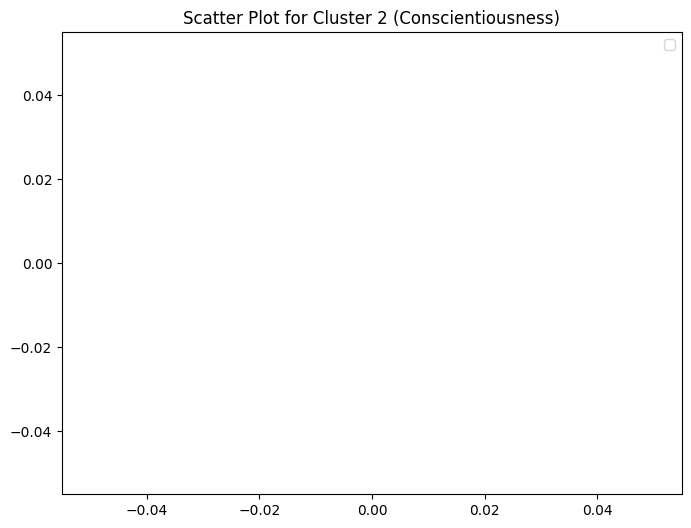

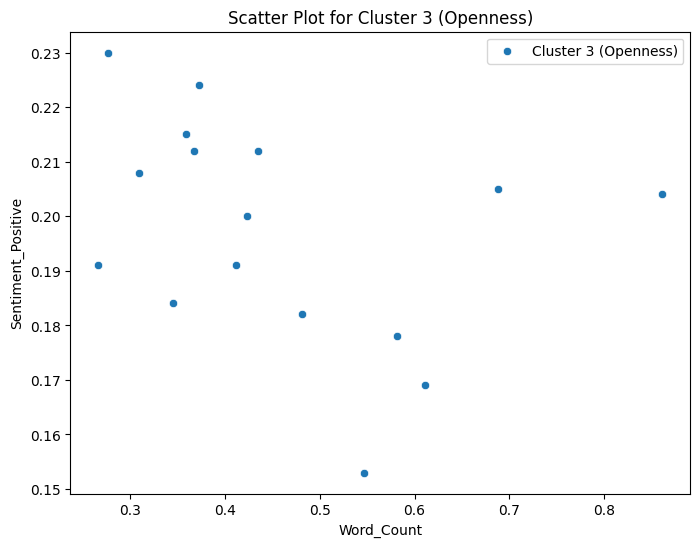

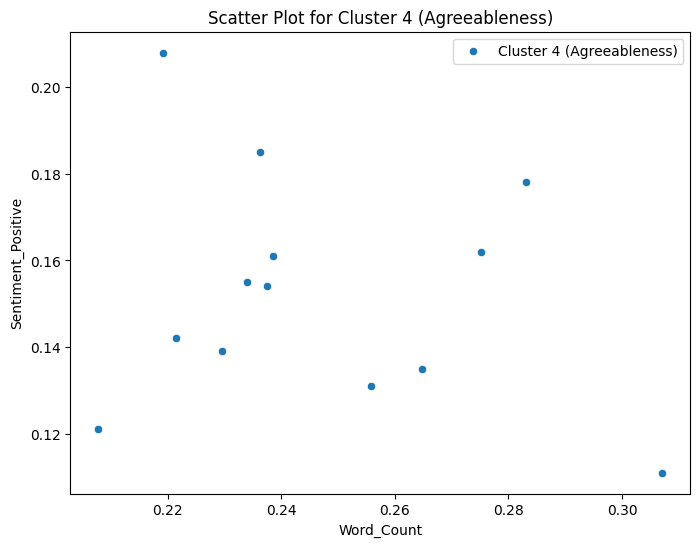

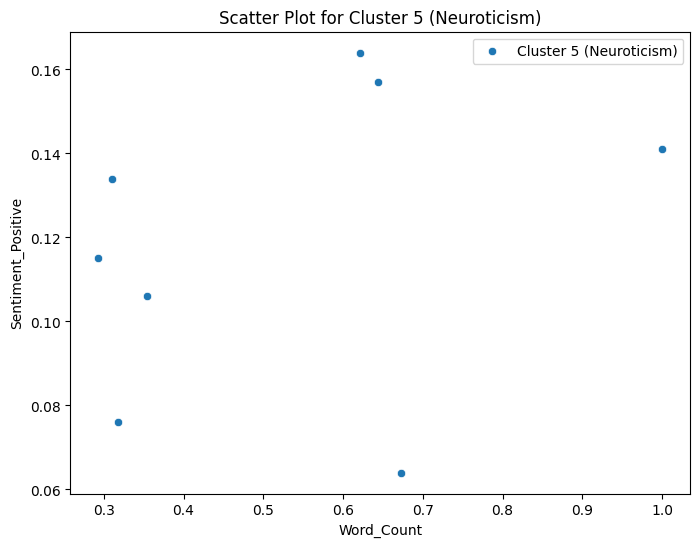

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary to map cluster labels to personality traits
cluster_labels = {
    0: "Cluster 1 (Extraversion)",
    1: "Cluster 2 (Conscientiousness)",
    2: "Cluster 3 (Openness)",
    3: "Cluster 4 (Agreeableness)",
    4: "Cluster 5 (Neuroticism)"
}

# Iterate over the clusters and their corresponding personality traits
for cluster, personality_trait in cluster_labels.items():
    cluster_data = df[df['Cluster'] == cluster]  # Filter data for the specific cluster
    plt.figure(figsize=(8, 6))  # Create a new figure
    sns.scatterplot(x='Word_Count', y='Sentiment_Positive', data=cluster_data, label=personality_trait)
    plt.title(f'Scatter Plot for {personality_trait}')
    plt.legend()
    plt.show()


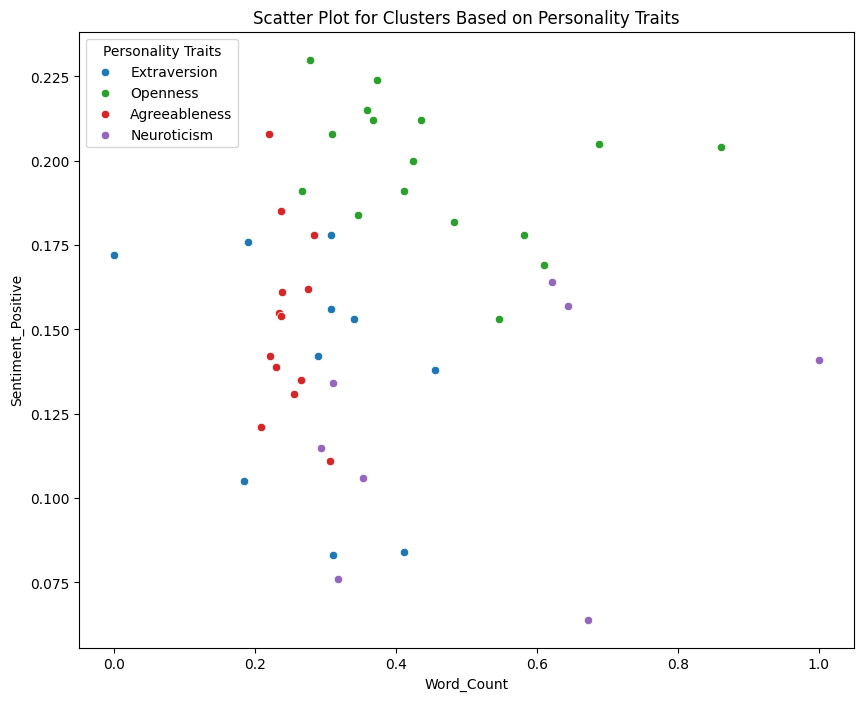

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary to map cluster labels to personality traits
cluster_labels = {
    0: "Extraversion",
    1: "Conscientiousness",
    2: "Openness",
    3: "Agreeableness",
    4: "Neuroticism"
}

# Create an empty scatter plot
plt.figure(figsize=(10, 8))

# Iterate over the clusters and their corresponding personality traits
for cluster, personality_trait in cluster_labels.items():
    cluster_data = df[df['Cluster'] == cluster]  # Filter data for the specific cluster
    sns.scatterplot(x='Word_Count', y='Sentiment_Positive', data=cluster_data, label=personality_trait)

# Set plot title and legend
plt.title('Scatter Plot for Clusters Based on Personality Traits')
plt.legend(title='Personality Traits')
plt.show()


In [ ]:
df.head()

,ID,Resume_str,Resume_html,Category,Cleaned_Resume,Word_Count,Avg_Word_Length,10,100,1990,...,wrote,year,yearly,years,Sentiment_Scores,Sentiment_Positive,Sentiment_Negative,Sentiment_Neutral,Sentiment_Compound,Cluster
1,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr associate hr administrator summary dedicate...,0.264840,0.483460,0.0,0.032151,0.0,...,0.000000,0.000000,0.0,0.000000,"{'neg': 0.022, 'neu': 0.843, 'pos': 0.135, 'co...",0.135,0.022,0.843,0.9954,3
2,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr operations summary versati...,0.283105,0.340792,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.131483,"{'neg': 0.004, 'neu': 0.819, 'pos': 0.178, 'co...",0.178,0.004,0.819,0.9981,3
3,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary 20 years experience recrui...,0.481735,0.365949,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.045091,"{'neg': 0.011, 'neu': 0.806, 'pos': 0.182, 'co...",0.182,0.011,0.806,0.9989,2
4,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedicated driven dynamic...,0.000000,0.151172,0.0,0.023992,0.0,...,0.029042,0.023992,0.0,0.000000,"{'neg': 0.032, 'neu': 0.796, 'pos': 0.172, 'co...",0.172,0.032,0.796,0.9906,0
5,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlights hr skills hr depar...,0.688356,0.347127,0.0,0.000000,0.0,...,0.048118,0.000000,0.0,0.000000,"{'neg': 0.014, 'neu': 0.78, 'pos': 0.205, 'com...",0.205,0.014,0.780,0.9995,2


In [ ]:
# Create a dictionary to map cluster labels to personality traits
cluster_labels = {
    0: "Extraversion",
    1: "Conscientiousness",
    2: "Openness",
    3: "Agreeableness",
    4: "Neuroticism"
}

# Create a new column 'Personality' based on cluster assignments
df['Personality'] = df['Cluster'].map(cluster_labels)

# Convert the 'Personality' column to a list with one element in each cell
df['Personality'] = df['Personality'].apply(lambda x: [x])


In [ ]:
df.head()

,ID,Resume_str,Resume_html,Category,Cleaned_Resume,Word_Count,Avg_Word_Length,10,100,1990,...,year,yearly,years,Sentiment_Scores,Sentiment_Positive,Sentiment_Negative,Sentiment_Neutral,Sentiment_Compound,Cluster,Personality
1,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr associate hr administrator summary dedicate...,0.264840,0.483460,0.0,0.032151,0.0,...,0.000000,0.0,0.000000,"{'neg': 0.022, 'neu': 0.843, 'pos': 0.135, 'co...",0.135,0.022,0.843,0.9954,3,[Agreeableness]
2,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr operations summary versati...,0.283105,0.340792,0.0,0.000000,0.0,...,0.000000,0.0,0.131483,"{'neg': 0.004, 'neu': 0.819, 'pos': 0.178, 'co...",0.178,0.004,0.819,0.9981,3,[Agreeableness]
3,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary 20 years experience recrui...,0.481735,0.365949,0.0,0.000000,0.0,...,0.000000,0.0,0.045091,"{'neg': 0.011, 'neu': 0.806, 'pos': 0.182, 'co...",0.182,0.011,0.806,0.9989,2,[Openness]
4,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedicated driven dynamic...,0.000000,0.151172,0.0,0.023992,0.0,...,0.023992,0.0,0.000000,"{'neg': 0.032, 'neu': 0.796, 'pos': 0.172, 'co...",0.172,0.032,0.796,0.9906,0,[Extraversion]
5,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlights hr skills hr depar...,0.688356,0.347127,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,"{'neg': 0.014, 'neu': 0.78, 'pos': 0.205, 'com...",0.205,0.014,0.780,0.9995,2,[Openness]


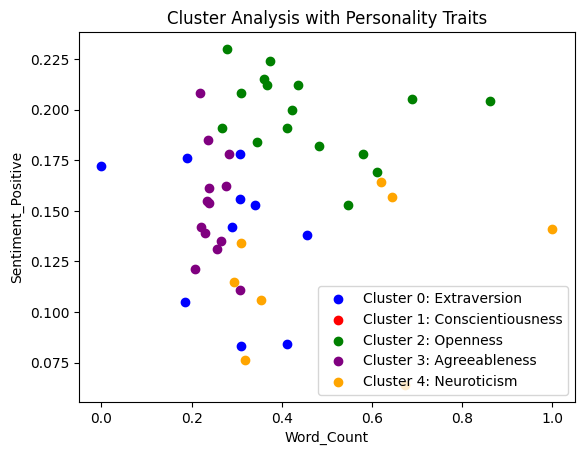

In [ ]:
# Assuming you have a DataFrame 'df' with the 'Cluster' column as cluster assignments

# Define colors for each cluster
cluster_colors = ['blue', 'red', 'green', 'purple', 'orange']

# Define personality traits corresponding to each cluster
cluster_personality = [
    "Extraversion",
    "Conscientiousness",
    "Openness",
    "Agreeableness",
    "Neuroticism"
]

# Create a scatterplot with different colors for each cluster and add legends
for cluster, color, personality_trait in zip(range(len(cluster_colors)), cluster_colors, cluster_personality):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Word_Count'], cluster_data['Sentiment_Positive'], color=color, label=f'Cluster {cluster}: {personality_trait}')

# Add a legend for cluster colors and personality traits
plt.legend()

# Customize the plot as needed (titles, labels, etc.)
plt.xlabel('Word_Count')
plt.ylabel('Sentiment_Positive')
plt.title('Cluster Analysis with Personality Traits')

# Show the plot
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_scaled)
wcss = kmeans.inertia_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

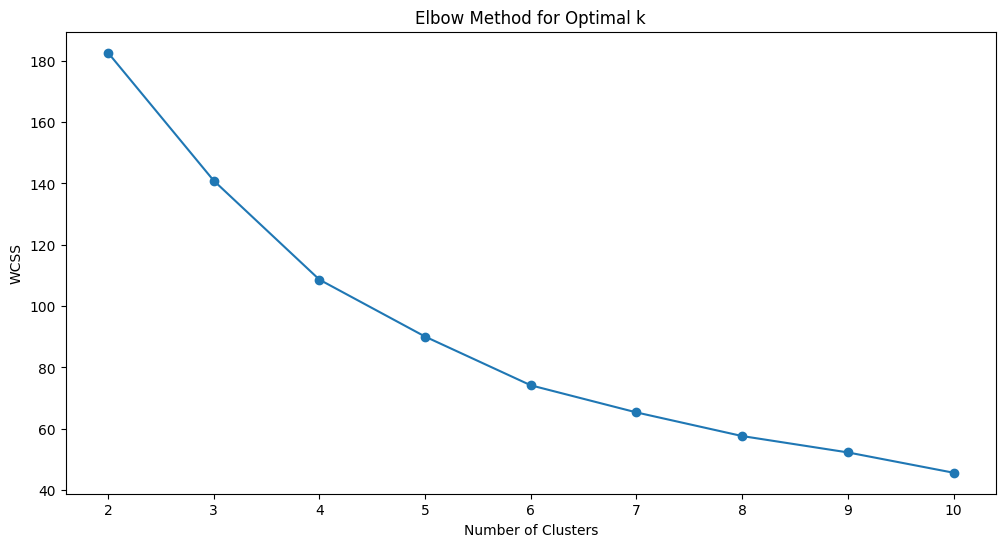

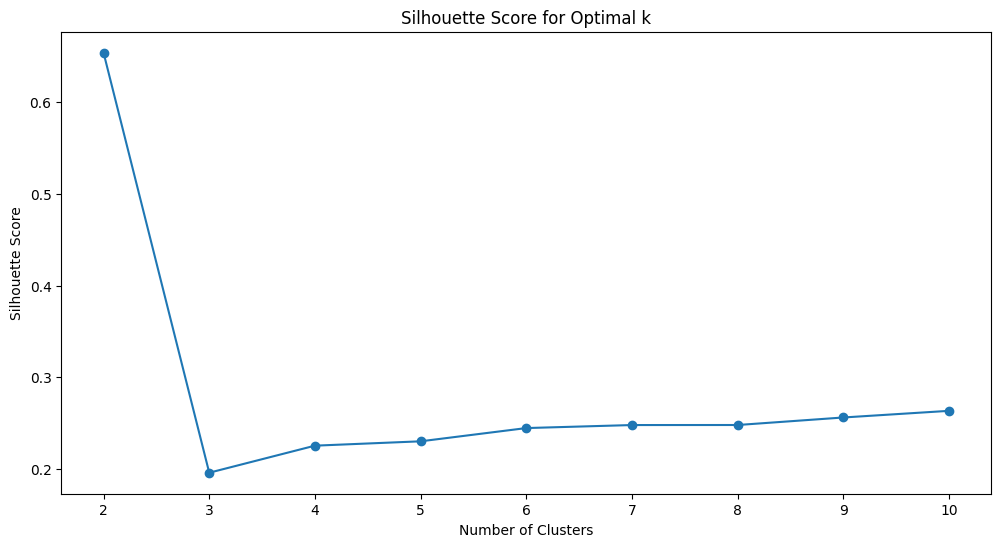

In [ ]:
wcss_values = []
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)  # Use data_scaled
    wcss_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)  # Use data_scaled
    silhouette_scores.append(silhouette_avg)

# Plot WCSS
plt.figure(figsize=(12, 6))
plt.plot(possible_k_values, wcss_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


In [ ]:
import pandas as pd
import random

# Load your dataset (assuming you've already loaded your data into a DataFrame)
# df = pd.read_csv('your_dataset.csv')

# Randomly select 20% of the data
sampled_data = df.sample(frac=0.2, random_state=42)  # Adjust the random_state for reproducibility

# Define a function to classify personality traits based on your conditions
def classify_personality_traits(data):
    traits = []

    # Extraversion
    if data['Word_Count'] > 150 or data['Avg_Word_Length'] > 5.5 or data['Sentiment_Positive'] > 0.3:
        traits.append('Extraversion')

    # Conscientiousness
    if data['Avg_Word_Length'] > 5.5:
        traits.append('Conscientiousness')

    # Openness
    if data['Sentiment_Compound'] > 0.1:
        traits.append('Openness')

    # Neuroticism
    if data['Word_Count'] < 50 or data['Avg_Word_Length'] < 4.5 or data['Sentiment_Negative'] > 0.2:
        traits.append('Neuroticism')

    # If you have specific conditions for Agreeableness, add them here.
    # Example: if data['Specific_Condition']:
    #             traits.append('Agreeableness')

    return traits

# Apply the classification function to the sampled data and create a new column 'Personality_Traits'
sampled_data['Personality_Traits'] = sampled_data.apply(classify_personality_traits, axis=1)

# Now you have a DataFrame 'sampled_data' with the 20% randomly selected data and their labeled personality traits.

# You can save this DataFrame to a new CSV file if needed:
# sampled_data.to_csv('sampled_data_with_labels.csv', index=False)


In [ ]:
# Create a DataFrame for the remaining 80% of data
remaining_data = df[~df.index.isin(sampled_data.index)]

In [ ]:
# Add the remaining data to the 'sampled_data' DataFrame
sampled_data = pd.concat([sampled_data, remaining_data])



In [ ]:
sampled_data.head()


,ID,Resume_str,Resume_html,Category,Cleaned_Resume,Word_Count,Avg_Word_Length,10,100,15,...,xp,year,years,york,Sentiment_Scores,Sentiment_Positive,Sentiment_Negative,Sentiment_Neutral,Sentiment_Compound,Personality_Traits
146,26676567,GRAPHIC DESIGNER Professional S...,"<div class=""fontsize fontface vmargins hmargin...",DESIGNER,graphic designer professional summary hi desig...,0.444144,0.629256,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,"{'neg': 0.009, 'neu': 0.771, 'pos': 0.22, 'com...",0.220,0.009,0.771,0.9997,[]
281,28126340,INFORMATION TECHNOLOGY COORDINATOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology coordinator professiona...,0.335586,0.536810,0.025945,0.000000,0.00000,...,0.0,0.000000,0.048091,0.000000,"{'neg': 0.009, 'neu': 0.818, 'pos': 0.173, 'co...",0.173,0.009,0.818,0.9992,[]
176,24455357,APPAREL TECHNICAL DESIGNER Care...,"<div class=""fontsize fontface vmargins hmargin...",DESIGNER,apparel technical designer career focus repres...,0.141892,0.618315,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,"{'neg': 0.005, 'neu': 0.804, 'pos': 0.191, 'co...",0.191,0.005,0.804,0.9975,[]
411,28642819,LEAD TEACHER Summary Solid ...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER,lead teacher summary solid background special ...,0.197297,0.635810,0.000000,0.037379,0.08211,...,0.0,0.122136,0.000000,0.047879,"{'neg': 0.028, 'neu': 0.776, 'pos': 0.196, 'co...",0.196,0.028,0.776,0.9981,[]
420,45987048,Marilyn Hunter Summary Focus...,"<div class=""RNA skn-mdl1 fontsize fontface vma...",TEACHER,marilyn hunter summary focused providing profe...,0.216667,0.870813,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,"{'neg': 0.01, 'neu': 0.805, 'pos': 0.184, 'com...",0.184,0.010,0.805,0.9984,[]


In [ ]:
# Save the updated DataFrame to a new CSV file
sampled_data.to_csv('sampled_data_with_labels.csv', index=False)

In [ ]:
# Split the merged DataFrame back into two separate DataFrames
sample_data = sampled_data[sampled_data['Personality_Traits'].notna()]
remaining_data = sampled_data[sampled_data['Personality_Traits'].isna()]


In [ ]:
sample_data.head()

,ID,Resume_str,Resume_html,Category,Cleaned_Resume,Word_Count,Avg_Word_Length,10,100,12,...,written,wrote,year,years,Sentiment_Scores,Sentiment_Positive,Sentiment_Negative,Sentiment_Neutral,Sentiment_Compound,Personality_Traits
1617,14698557,GENERAL MANAGER Summary com...,"<div class=""fontsize fontface vmargins hmargin...",APPAREL,general manager summary company would offer gr...,0.130042,0.647162,0.0,0.0,0.0,...,0.000000,0.000000,0.032960,0.0,"{'neg': 0.01, 'neu': 0.829, 'pos': 0.161, 'com...",0.161,0.010,0.829,0.9972,"[Openness, Neuroticism]"
1311,24679149,DIGITAL PROJECT MANAGER Highl...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA,digital project manager highlights html css ms...,0.141608,0.498498,0.0,0.0,0.0,...,0.000000,0.000000,0.023314,0.0,"{'neg': 0.003, 'neu': 0.85, 'pos': 0.147, 'com...",0.147,0.003,0.850,0.9971,"[Openness, Neuroticism]"
2283,28325193,THEATER ARTS TEACHER & PROGRAM DIRECT...,"<div class=""fontsize fontface vmargins hmargin...",ARTS,theater arts teacher program director summary ...,0.156559,0.369644,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,"{'neg': 0.009, 'neu': 0.879, 'pos': 0.112, 'co...",0.112,0.009,0.879,0.9954,"[Openness, Neuroticism]"
434,24240349,SUBSTITUTE TEACHER Summary A...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER,substitute teacher summary administrative assi...,0.140197,0.733820,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,"{'neg': 0.019, 'neu': 0.85, 'pos': 0.131, 'com...",0.131,0.019,0.850,0.9945,"[Openness, Neuroticism]"
1279,16893572,DIGITAL MARKETING MANAGER S...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA,digital marketing manager summary creative man...,0.184485,0.562284,0.0,0.0,0.0,...,0.075921,0.047396,0.000000,0.0,"{'neg': 0.002, 'neu': 0.834, 'pos': 0.164, 'co...",0.164,0.002,0.834,0.9986,"[Openness, Neuroticism]"


In [ ]:
# Add an empty 'Personality_Traits' column to the DataFrame
remaining_data.loc[:, 'Personality_Traits'] = np.nan


<ipython-input-25-433983cba40a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remaining_data.loc[:, 'Personality_Traits'] = np.nan
<ipython-input-25-433983cba40a>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  remaining_data.loc[:, 'Personality_Traits'] = np.nan


In [ ]:
remaining_data.head()

,ID,Resume_str,Resume_html,Category,Cleaned_Resume,Word_Count,Avg_Word_Length,10,100,12,...,written,wrote,year,years,Sentiment_Scores,Sentiment_Positive,Sentiment_Negative,Sentiment_Neutral,Sentiment_Compound,Personality_Traits
1,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr associate hr administrator summary dedicate...,0.141044,0.671323,0.0,0.040821,0.0,...,0.000000,0.000000,0.000000,0.000000,"{'neg': 0.022, 'neu': 0.843, 'pos': 0.135, 'co...",0.135,0.022,0.843,0.9954,NaN
2,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr operations summary versati...,0.145557,0.623376,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.095464,"{'neg': 0.004, 'neu': 0.819, 'pos': 0.178, 'co...",0.178,0.004,0.819,0.9981,NaN
3,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary 20 years experience recrui...,0.194640,0.631831,0.0,0.000000,0.0,...,0.059525,0.000000,0.000000,0.037593,"{'neg': 0.011, 'neu': 0.806, 'pos': 0.182, 'co...",0.182,0.011,0.806,0.9989,NaN
4,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedicated driven dynamic...,0.075599,0.559649,0.0,0.019608,0.0,...,0.000000,0.022174,0.014661,0.000000,"{'neg': 0.032, 'neu': 0.796, 'pos': 0.172, 'co...",0.172,0.032,0.796,0.9906,NaN
5,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlights hr skills hr depar...,0.245698,0.625505,0.0,0.000000,0.0,...,0.000000,0.050194,0.000000,0.000000,"{'neg': 0.014, 'neu': 0.78, 'pos': 0.205, 'com...",0.205,0.014,0.780,0.9995,NaN


In [ ]:
# Import the necessary library
from sklearn.preprocessing import MultiLabelBinarizer

# Sample_data should contain a 'Personality_Traits' column with lists of personality traits
# For example: ['Extraversion', 'Openness']

# Instantiate the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the personality traits into one-hot encoded format
y_sample = mlb.fit_transform(sample_data['Personality_Traits'])

# Now y_sample should contain one-hot encoded personality traits


In [ ]:
sample_data['Personality_Traits'].unique()

TypeError: ignored

In [ ]:
print(y_sample.shape)


(85,)


In [ ]:
unique_traits = set()
for traits_list in sample_data['Personality_Traits']:
    unique_traits.update(traits_list)

print(len(unique_traits))


0


In [ ]:
print(y_sample[:5])  # Print the first 5 rows


146    []
281    []
176    []
411    []
420    []
Name: Personality_Traits, dtype: object


In [ ]:
# Import the necessary library
from sklearn.preprocessing import MultiLabelBinarizer

# Check for rows with missing or empty lists in 'Personality_Traits' column
sample_data = sample_data.dropna(subset=['Personality_Traits'])
sample_data = sample_data[sample_data['Personality_Traits'].apply(lambda x: len(x) > 0)]

# Instantiate the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the personality traits into one-hot encoded format
y_sample = mlb.fit_transform(sample_data['Personality_Traits'])

# Now, check the shape, uniqueness, and the transformed data again
print(y_sample.shape)
unique_traits = set()
for traits_list in sample_data['Personality_Traits']:
    unique_traits.update(traits_list)
print(len(unique_traits))
print(y_sample[:5])  # Print the first 5 rows


(0, 0)
0
[]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow import keras

# Sample_data should contain a 'Personality_Traits' column with one-hot encoded personality traits
# For example: [1, 0, 1, 0, 1] for ['Extraversion', 'Conscientiousness', 'Openness', 'Agreeableness', 'Neuroticism']
# X_sample should contain your input data

# Instantiate the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Build a neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(y_train.shape[1], activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# You can use the trained model to make predictions on new data
predictions = model.predict(new_data)


ValueError: ignored

# New Section